# scikit-learn-svm

Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas
致谢：派生自 Jake VanderPlas 的 [PyCon 2015 Scikit-learn 教程](https://github.com/jakevdp/sklearn_pycon2015)

* Support Vector Machine Classifier 支持向量机分类器
* Support Vector Machine with Kernels Classifier 带核的支持向量机分类器

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

## Support Vector Machine Classifier

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs draw a boundary between clusters of data.  SVMs attempt to maximize the margin between sets of points.  Many lines can be drawn to separate the points above: 支持向量机 (SVM) 是一种强大的监督学习算法，用于**分类**或**回归**。SVM 在数据聚类之间绘制边界，并试图最大化数据点集之间的边距。可以绘制多条线来分隔上述数据点：

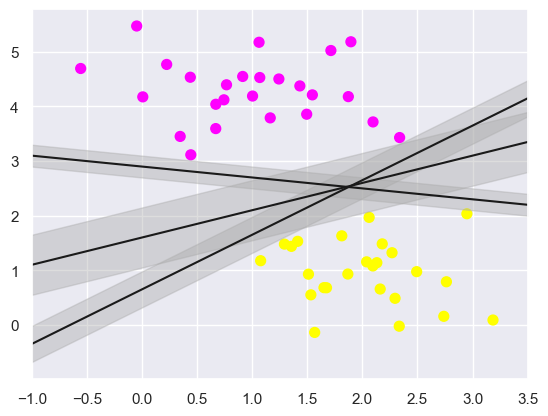

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Fit the model:

拟合模型：

In [3]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Plot the boundary: 绘制边界

In [24]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            result = clf.decision_function([[xi, yj]])
            P[i, j] = result.item()
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In the following plot the dashed lines touch a couple of the points known as *support vectors*, which are stored in the ``support_vectors_`` attribute of the classifier: 在下图中，虚线触及几个称为“支持向量”的点，这些点存储在分类器的“support_vectors_”属性中：

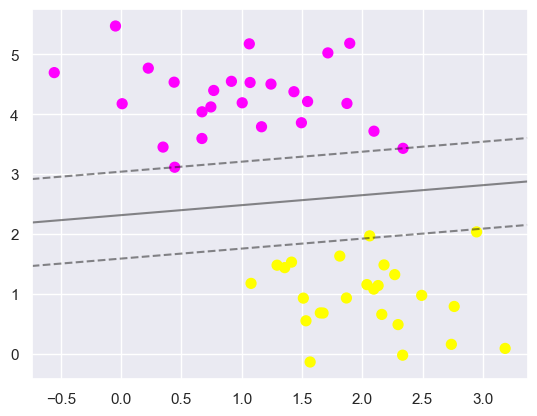

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

Use IPython's ``interact`` functionality to explore how the distribution of points affects the support vectors and the discriminative fit:

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

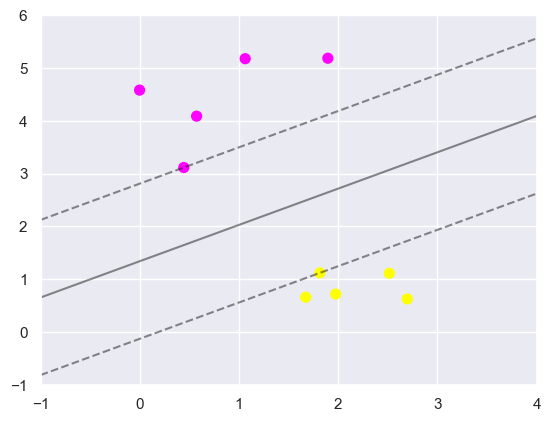

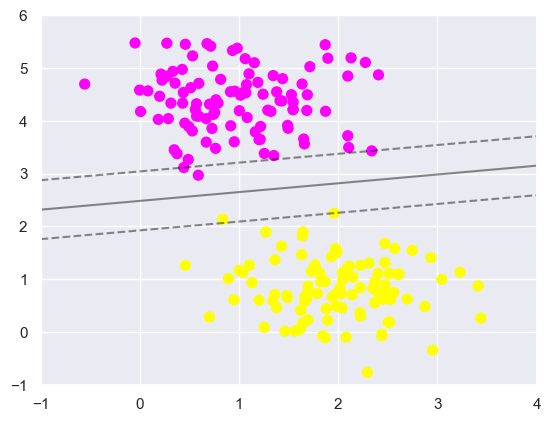

In [26]:
from ipywidgets import interact

def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

## Support Vector Machine with Kernels Classifier
## 带核的支持向量机分类器

Kernels are useful when the decision boundary is not linear.  A Kernel is some functional transformation of the input data.  SVMs have clever tricks to ensure kernel calculations are efficient.  In the example below, a linear boundary is not useful in separating the groups of points:

当决策边界不是线性时，核很有用。核是输入数据的一些函数转换。SVM 有巧妙的技巧来确保核计算是高效的。在下面的示例中，线性边界在分离点组方面没有用：

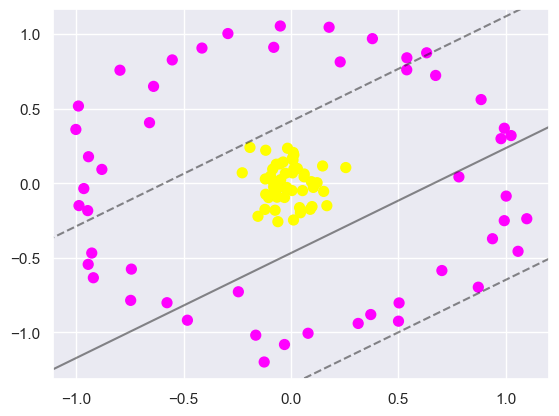

In [28]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

A simple model that could be useful is a **radial basis function**:

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

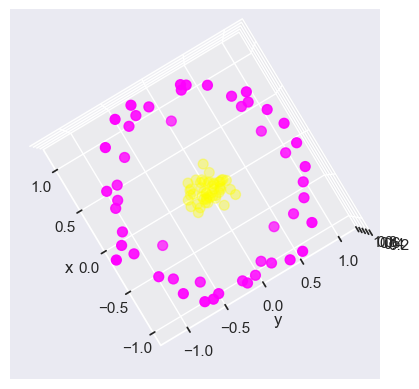

In [30]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

In three dimensions, there is a clear separation between the data.  Run the SVM with the rbf kernel:
在三维空间中，数据之间存在明显的分离。使用 rbf 核运行 SVM：

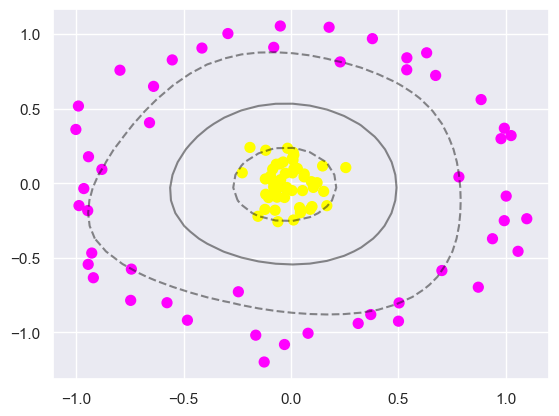

In [31]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

SVM additional notes:
SVM 附加说明：
* When using an SVM you need to choose the right values for parameters such as c and gamma.  Model validation can help to determine these optimal values by trial and error. 

使用 SVM 时，您需要为 c 和 gamma 等参数选择正确的值。模型验证可以通过反复试验来帮助确定这些最佳值。

* SVMs run in O(n^3) performance.  LinearSVC is scalable, SVC does not seem to be scalable.  For large data sets try transforming the data to a smaller space and use LinearSVC with rbf. 

SVM 的性能为 O(n^3)。LinearSVC 是可扩展的，SVC 似乎不可扩展。对于大型数据集，请尝试将数据转换为较小的空间并使用带有 rbf 的 LinearSVC。